# AI CALCULATOR

## Libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt
import shutil # copy, move file
import os # miscellaneous operation system interfaces
import pathlib
import random
import numpy as np

%matplotlib inline

# let's hope we got tensorflow 2 installed
# Other wise  !pip install tensorflow-gpu==2.0.0
import tensorflow as tf
tf.__version__

'2.0.0'

## Path lead to photos

In [2]:
#!unzip data.zip

In [3]:
# create a path to data folder
# data_root = pathlib.Path('./first_half_mul')
data_root = pathlib.Path('../extracted_images')

In [4]:
# double check our current directory
!pwd

/Users/macmac/Documents/Machine Learning/WeekEight/model_ml


#### Take all images and paths lead to these images

In [5]:
# Find all image's path
all_image_paths = list(data_root.glob("**/*"))

# check if the path contains file
all_image_paths = [str(path) for path in all_image_paths if path.is_file()]

# time to shuffle our data
random.shuffle(all_image_paths)

#### Total images

In [6]:
# total images
image_count = len(all_image_paths)
image_count

375975

In [7]:
# read image files and ignore DS_Store
for index, image_path in enumerate(all_image_paths):
    if (image_path.split('.')[1] != "DS_Store") :
        try:
            image = tf.io.read_file(image_path)
            image = tf.image.decode_jpeg(image, channels=3)
        except:
            print(all_image_paths[index])
        if index % 3000 == 0: 
            print(index)
    else:
        all_image_paths.remove(image_path)

0
3000
6000
9000
12000
15000
18000
21000
24000
27000
30000
33000
36000
39000
42000
45000
48000
51000
54000
57000
60000
63000
66000
69000
72000
75000
78000
81000
84000
87000
90000
93000
96000
99000
102000
105000
108000
111000
114000
117000
120000
123000
126000
129000
../extracted_images/.DS_Store
132000
135000
138000
141000
144000
147000
150000
153000
156000
159000
162000
165000
168000
171000
174000
177000
180000
183000
186000
189000
192000
195000
198000
201000
204000
207000
210000
213000
216000
219000
222000
225000
228000
231000
234000
237000
240000
243000
246000
249000
252000
255000
258000
261000
264000
267000
270000
273000
276000
279000
282000
285000
288000
291000
294000
297000
300000
303000
306000
309000
312000
315000
318000
321000
324000
327000
330000
333000
336000
339000
342000
345000
348000
351000
354000
357000
360000
363000
366000
369000
372000
375000


### Take labels

In [8]:
# get labels from folder names
label_names = sorted(item.name for item in data_root.glob('**/') if item.is_dir())

label_names = np.array(label_names)
label_names, len(label_names)

(array(['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6',
        '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R',
        'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos',
        'd', 'div', 'e', 'exists', 'extracted_images', 'f', 'forall',
        'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int',
        'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'mu',
        'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'rightarrow',
        'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v',
        'w', 'y', 'z', '{', '}'], dtype='<U16'), 83)

In [9]:
# might have to remove stuffs from unrelevant labels
# label_names.remove('.ipynb_checkpoints')
# label_names=label_names[:-2].astype(int)
# label_names=label_names[:-1]
label_names=np.delete(label_names,np.where(label_names=='extracted_images'))

In [10]:
label_names, len(label_names)

(array(['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6',
        '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R',
        'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos',
        'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma',
        'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda',
        'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi',
        'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt',
        'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}'],
       dtype='<U16'), 82)

In [11]:
label = np.arange(len(label_names))

In [12]:
label

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

In [13]:
# we want the label to be in order so we dont need to remember the order it appear 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 ...
# label_names.sort()

In [14]:
# make sure the label in nice order
label_names

array(['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R',
       'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos',
       'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma',
       'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda',
       'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi',
       'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt',
       'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}'],
      dtype='<U16')

### Set index for labels

In [15]:
# create dictionary for prediction index to real label (in our case, it happens to be very similar on both side)
label_to_index = dict((str(name), index) for index, name in enumerate(label_names))
label_to_index

{'!': 0,
 '(': 1,
 ')': 2,
 '+': 3,
 ',': 4,
 '-': 5,
 '0': 6,
 '1': 7,
 '2': 8,
 '3': 9,
 '4': 10,
 '5': 11,
 '6': 12,
 '7': 13,
 '8': 14,
 '9': 15,
 '=': 16,
 'A': 17,
 'C': 18,
 'Delta': 19,
 'G': 20,
 'H': 21,
 'M': 22,
 'N': 23,
 'R': 24,
 'S': 25,
 'T': 26,
 'X': 27,
 '[': 28,
 ']': 29,
 'alpha': 30,
 'ascii_124': 31,
 'b': 32,
 'beta': 33,
 'cos': 34,
 'd': 35,
 'div': 36,
 'e': 37,
 'exists': 38,
 'f': 39,
 'forall': 40,
 'forward_slash': 41,
 'gamma': 42,
 'geq': 43,
 'gt': 44,
 'i': 45,
 'in': 46,
 'infty': 47,
 'int': 48,
 'j': 49,
 'k': 50,
 'l': 51,
 'lambda': 52,
 'ldots': 53,
 'leq': 54,
 'lim': 55,
 'log': 56,
 'lt': 57,
 'mu': 58,
 'neq': 59,
 'o': 60,
 'p': 61,
 'phi': 62,
 'pi': 63,
 'pm': 64,
 'prime': 65,
 'q': 66,
 'rightarrow': 67,
 'sigma': 68,
 'sin': 69,
 'sqrt': 70,
 'sum': 71,
 'tan': 72,
 'theta': 73,
 'times': 74,
 'u': 75,
 'v': 76,
 'w': 77,
 'y': 78,
 'z': 79,
 '{': 80,
 '}': 81}

### Set label for each image

In [16]:
processed_paths = all_image_paths
# del_arr = np.array([])
for path in all_image_paths:
    if pathlib.Path(path).parent.name == 'extracted_images':
        processed_paths.remove(path)
#         del_arr=np.insert(del_arr, 0, path)
# processed_paths=np.delete(processed_paths,np.where(processed_paths==del_arr[::-1]))

In [17]:
# Find all image's labels from all_image_paths
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in processed_paths]
# all_image_labels = [label_to_index[pathlib.Path(path).name.split('_')[0]]
#                     for path in all_image_paths]

# get the first 10 lables to check if the random shuffle actually work
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [20, 3, 3, 3, 71, 39, 8, 10, 51, 4]


### Count amount per class

In [18]:
# Count number of images from each class
from collections import Counter
cnt = Counter()

for label in all_image_labels:
    cnt[label_names[label]] += 1
  
cnt

Counter({'G': 1692,
         '+': 25112,
         'sum': 2689,
         'f': 3712,
         '2': 26141,
         '4': 7396,
         'l': 1017,
         ',': 1906,
         'sin': 4293,
         'y': 9340,
         'N': 10862,
         'beta': 2025,
         'cos': 2986,
         'X': 26594,
         '(': 14294,
         'sqrt': 8908,
         'log': 2001,
         'infty': 1783,
         '-': 33997,
         'z': 5870,
         '1': 26520,
         'i': 5140,
         'b': 8651,
         'w': 556,
         '9': 3737,
         'u': 1269,
         'ascii_124': 1339,
         'geq': 693,
         '0': 6914,
         'sigma': 201,
         'rightarrow': 1703,
         'int': 2742,
         'd': 4852,
         '7': 2909,
         'e': 3003,
         'gt': 258,
         '6': 3118,
         'theta': 2796,
         'H': 1464,
         ')': 14355,
         'v': 1558,
         '=': 13104,
         '3': 10909,
         'A': 12367,
         '8': 3068,
         '{': 376,
         'C': 5802,
      

## Functions

In [19]:
# preprocessing image: decode_jpeg with 3 channels, rgb_to_grayscale, resize to (28,28) then standard by /255.
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.resize(image, [28, 28]) #data is 45x45
    image = (255 - image)/255.0

    return image

# load and use preprocess_image function
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

../extracted_images/f/f_106669.jpg


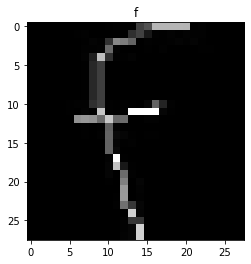

In [20]:
# pick a random image and show it
index = random.randint(0, image_count)
image_path = all_image_paths[index]
label = all_image_labels[index]

# show path file
print(image_path)

# show image
plt.imshow(load_and_preprocess_image(image_path)[:,:,0], cmap='gray')
plt.grid(False)
plt.title(label_names[label])
plt.show()

In [21]:
# split the data for train set and test set
from sklearn.model_selection import train_test_split

train_image_paths, test_image_paths, train_image_labels, test_image_labels = train_test_split(all_image_paths, all_image_labels, test_size=0.2, random_state=101)

In [22]:
test_image_paths[0], test_image_labels[0]

('../extracted_images/8/exp59064.jpg', 14)

In [23]:
# The tuples are unpacked into the positional arguments of the mapped function (keras requires this)
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

# creating dataset
def create_ds(all_image_paths, all_image_labels):
    
    # prepare the dataset for pipeline with tensor_slices
    ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))
    
    # map the load_and_preprocess_from_path_label function to the pipeline
    image_label_ds = ds.map(load_and_preprocess_from_path_label)

    # Setting a shuffle buffer size as large as the dataset ensures that the data is
    # completely shuffled.
    # so the order of training will be different for every eponch
    ds = image_label_ds.shuffle(buffer_size=image_count)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    # `prefetch` lets the dataset fetch batches in the background while the model is training.
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

In [24]:
# create dataset for train set and test set
train_set = create_ds(train_image_paths, train_image_labels)
test_set = create_ds(test_image_paths, test_image_labels)

## Model summary

In [25]:
# our model, 3 layers of CNN + Batch Normalization + Relu, Flatten, Dense + Bath Normalization + Relu + Dropout, Last Layer(12) + softmax
cnn_model = tf.keras.Sequential(
  [   
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, use_bias=False, padding='same', input_shape=(28, 28, 1)),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Flatten(),
      
      tf.keras.layers.Dense(200, use_bias=False),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(len(label_names), activation='softmax')
  ])

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 12)        108       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 12)        36        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 24)        10368     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 24)        72        
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          2

## Customized Callback

In [26]:
# create object batch stats to store accuracy and loss values 
class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_acc = []
        self.batch_val_losses = []
        self.batch_val_acc = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['accuracy'])

    def on_test_batch_end(self, batch, logs=None):
        self.batch_val_losses.append(logs['loss'])
        self.batch_val_acc.append(logs['accuracy'])


In [ ]:
# Setting up EarlyStopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      mode='min',
                                      restore_best_weights=True,
                                      min_delta=1e-4,
                                      verbose=1,
                                      patience=3)

## TRAINING

In [27]:
# calculate the number of steps to finish one epoch
steps_per_epoch = len(train_image_labels) // BATCH_SIZE
val_steps_per_epoch = len(test_image_labels) // BATCH_SIZE
batch_stats_callback = CollectBatchStats()

# FIT THE DATA NOW
history = cnn_model.fit(train_set, epochs=10, 
            steps_per_epoch=steps_per_epoch,
            callbacks = [batch_stats_callback, es],
            validation_data=test_set,
            validation_steps=val_steps_per_epoch)

Train for 9399 steps, validate for 2349 steps
Epoch 1/10
9399/9399 [==============================] - 1238s 132ms/step - loss: 0.4089 - accuracy: 0.8849 - val_loss: 0.2530 - val_accuracy: 0.9266
Epoch 2/10
9399/9399 [==============================] - 1146s 122ms/step - loss: 0.2525 - accuracy: 0.9258 - val_loss: 0.2255 - val_accuracy: 0.9326
Epoch 3/10
9399/9399 [==============================] - 1184s 126ms/step - loss: 0.2138 - accuracy: 0.9365 - val_loss: 0.1846 - val_accuracy: 0.9535
Epoch 4/10
9399/9399 [==============================] - 885s 94ms/step - loss: 0.1901 - accuracy: 0.9435 - val_loss: 0.1233 - val_accuracy: 0.9628
Epoch 5/10
9399/9399 [==============================] - 935s 99ms/step - loss: 0.1759 - accuracy: 0.9480 - val_loss: 0.1157 - val_accuracy: 0.9648
Epoch 6/10
9399/9399 [==============================] - 1064s 113ms/step - loss: 0.1672 - accuracy: 0.9509 - val_loss: 0.1163 - val_accuracy: 0.9662
Epoch 7/10
9399/9399 [==============================] - 1082s 11

In [28]:
def plot_loss(training_losses, val_losses, x_label='Training Steps'):
    plt.figure()
    plt.ylabel("Loss")
    plt.xlabel(x_label)
    
    training_steps = len(training_losses)
    test_steps = len(val_losses)
    plt.plot(training_losses, label='Training Loss')
    plt.plot(np.linspace(0, training_steps, test_steps), val_losses, label='Validation Loss')
    plt.ylim([0,max(plt.ylim())])
    plt.legend(loc='upper right')
    plt.show()

In [29]:
def plot_accuracy(training_acc, val_acc, x_label='Training Steps'):
    plt.figure()
    plt.ylabel("Accuracy")
    plt.xlabel(x_label)
    
    training_steps = len(training_acc)
    test_steps = len(val_acc)
    plt.plot(training_acc, label='Training Accuracy')
    plt.plot(np.linspace(0, training_steps, test_steps), val_acc, label='Validation Accuracy')
    plt.ylim([0,1])
    plt.legend(loc='lower right')
    plt.show()

<Figure size 432x288 with 0 Axes>

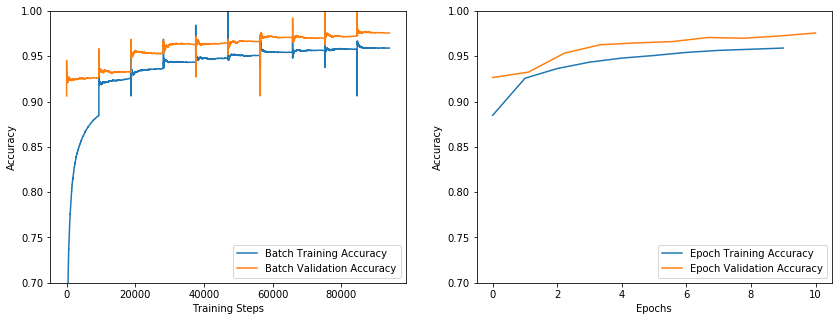

In [30]:
def plot_training_results(training_acc, val_acc, epoch_acc, epoch_val_acc):
    plt.figure()
    fig, ax = plt.subplots(1, 2, figsize=[14, 5])

    # Plot batchs training & validation accuracy
    ax[0].set_ylabel("Accuracy")
    ax[0].set_xlabel("Training Steps")

    training_steps = len(training_acc)
    test_steps = len(val_acc)
    ax[0].plot(training_acc, label='Batch Training Accuracy')
    ax[0].plot(np.linspace(0, training_steps, test_steps), val_acc, label='Batch Validation Accuracy')
    ax[0].set_ylim([0.7,1])
    ax[0].legend(loc='lower right')

    # Plot epochs training & validation accuracy
    ax[1].set_ylabel("Accuracy")
    ax[1].set_xlabel("Epochs")

    train_epochs = len(epoch_acc)
    val_epochs = len(epoch_val_acc)
    ax[1].plot(epoch_acc, label='Epoch Training Accuracy')
    ax[1].plot(np.linspace(0, train_epochs, val_epochs), epoch_val_acc, label='Epoch Validation Accuracy')
    ax[1].set_ylim([0.7,1])
    ax[1].legend(loc='lower right')

    plt.show()

plot_training_results(batch_stats_callback.batch_acc,      #batch stats
                      batch_stats_callback.batch_val_acc,  #batch stats
                      history.history['accuracy'],         #epoch stats
                      history.history['val_accuracy']      #epoch stats
                     )

## Testing and preview

In [31]:
# Take 1 batch out to test

for image_batch, label_batch in test_set:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 28, 28, 1)
Label batch shape:  (32,)


In [32]:
# Predict
label_names = np.array(label_names)
predicted_batch = cnn_model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=1)
predicted_label_batch = label_names[predicted_id]

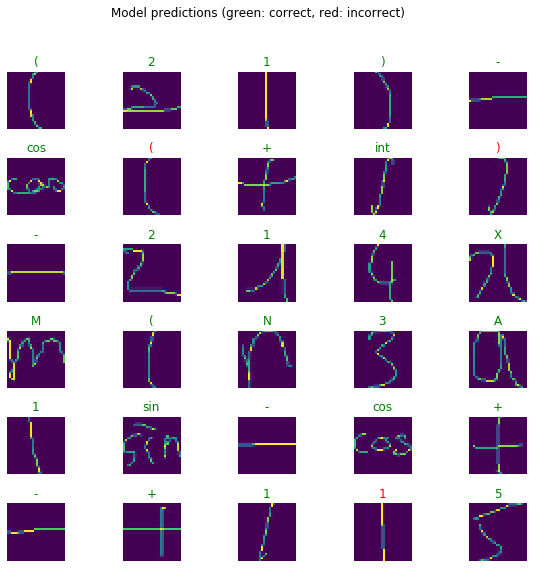

In [33]:
# Plot the result

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n][:,:,0])
    color = "green" if predicted_id[n] == label_batch.numpy()[n] else "red"
    plt.title(predicted_label_batch[n], color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

## Export model

In [38]:
# Export model
cnn_model.save('kaggle_data.h5')

In [39]:
# Test model

reloaded_model = tf.keras.models.load_model('kaggle_data.h5')
reloaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 12)        108       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 12)        36        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 24)        10368     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 24)        72        
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          2

In [40]:
# test if the current model result and export model result is consistent
result_batch = cnn_model.predict(image_batch)
reloaded_result_batch = reloaded_model.predict(image_batch)

In [41]:
# check if there is any difference
abs(reloaded_result_batch - result_batch).max()

0.0